In [1]:
from pathlib import Path

In [2]:
import numpy as np

In [3]:
from envs.maze import MazeEnv
from value_function_utils import visualize_maze_values

In [4]:
discount = 0.9
iters = 1000

In [13]:
env = MazeEnv()
state_dim = env.distinct_states
state_values = np.zeros(state_dim)
q_values = np.zeros((state_dim, env.action_space.n))
policy = np.zeros(state_dim)

In [6]:
def calculate_values(state, action):
    """Evaluate Value function for given state and action
    
    Args:
        state (int): Valid (discrete) state in discrete `env.observation_space`
        action (int): Valid (discrete) action is discrete `env.action_space`
    
    Returns:
        v_sum: value for given state, action
    
    """
    v_sum = 0
    transitions = []
    slip_action = env.slip_action_map[action]
    env.set_state(state)
    slip_next_state, slip_reward, _ = env.step(slip_action, slip=False)
    transitions.append((slip_reward, slip_next_state, env.slip_probability))
    env.set_state(state)
    next_state, reward, _ = env.step(action, slip=False)
    transitions.append((reward, next_state, 1-env.slip_probability))
    for reward, next_state, pi in transitions:
        v_sum += pi * (reward + discount * state_values[next_state])
    return v_sum

In [14]:
# Value iteration
for i in range(iters):
    v_s = np.zeros(state_dim)
    for state in range(state_dim):
        if env.index_to_coordinate_map[int(state/8)] == env.goal_pos:
            continue
        v_max = float("-inf")
        for action in range(env.action_space.n):
            v_sum = calculate_values(state, action)
            v_max = max(v_max, v_sum)
        v_s[state] = v_max
    state_values = np.copy(v_s)




In [54]:
for state in range(state_dim):
    print(state, end=', ')
    for action in range(env.action_space.n):
        q_values[state, action] = calculate_values(state, action)

In [64]:
policy = np.argmax(q_values, axis=1)
print(policy)

[1 2 2 2 2 2 2 2 3 0 0 0 0 0 0 0 1 1 3 1 3 1 3 3 3 2 3 3 2 2 2 2 3 1 0 1 0
 0 0 0 2 2 0 2 0 2 0 0 0 1 0 0 1 1 0 1 0 1 0 0 2 2 0 2 3 3 0 0 2 2 0 2 1 1
 2 2 2 2 2 2 1 1 1 2 1 2 2 2 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2]


Action mapping: [0 - UP; 1 - DOWN; 2 - LEFT; 3 - RIGHT]
Optimal actions:
[1 2 2 2 2 2 2 2 3 0 0 0 0 0 0 0 1 1 3 1 3 1 3 3 3 2 3 3 2 2 2 2 3 1 0 1 0
 0 0 0 2 2 0 2 0 2 0 0 0 1 0 0 1 1 0 1 0 1 0 0 2 2 0 2 3 3 0 0 2 2 0 2 1 1
 2 2 2 2 2 2 1 1 1 2 1 2 2 2 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2]


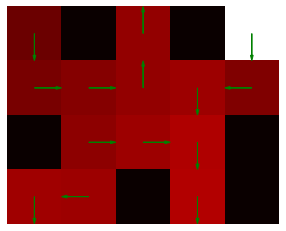

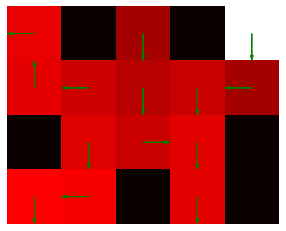

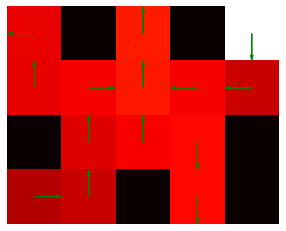

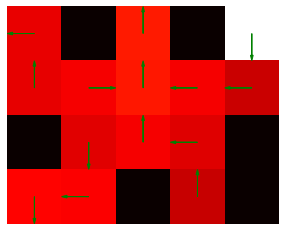

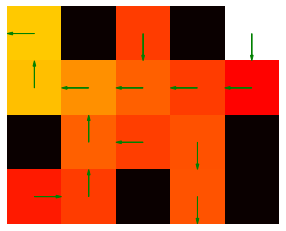

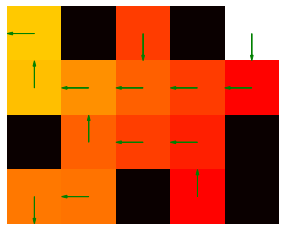

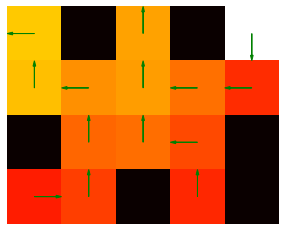

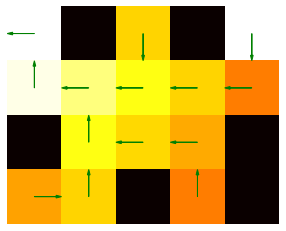

In [65]:
Path("results").mkdir(exist_ok=True)
np.save("results/q_values", q_values)
np.save("results/optimal_policy", policy)
# print(q_values)
print("Action mapping: [0 - UP; 1 - DOWN; 2 - LEFT; 3 - RIGHT]")
print("Optimal actions:")
print(policy)
visualize_maze_values(q_values, env)